In [1]:
%matplotlib inline

## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [2]:
# Create dataframe
import pandas as pd

dct1 = {
    'nb_scores':[i for i in range(0,7+1)],
    'nb_times': [35,99,104,110,62,25,10,3]
}

data1 = pd.DataFrame(dct1)
data1

,nb_scores,nb_times
0,0,35
1,1,99
2,2,104
3,3,110
4,4,62
5,5,25
6,6,10
7,7,3


In [10]:
# Convert frequency dataframe into array
import numpy as np

lst = []

for i in range(len(data1)):
    lst.extend([data1.nb_scores[i]] * data1.nb_times[i])

sample1 = np.array(lst)

In [11]:
# Compute sample mean
np.mean(sample1)
# 2.435

2.435267857142857

In [17]:
# Compute sample variable
np.var(sample1)
# 2.167
# Relatively close to mean, so it *may* follow a Poisson distribution

2.169916892538265

In [34]:
# Generate random Poisson variable with sample mean
import scipy.stats as stats

# Compute probability and expected frequency for all categories but the last one
probs1 = stats.poisson.pmf(data1.nb_scores[0:-1], np.mean(sample1))
exps1 = probs1 * data1.nb_times.sum()
exps1



array([ 39.23328036,  95.54354658, 116.33706397,  94.43730416,
        57.49503284,  28.00316108,  11.36586635])

In [36]:
# Add expected frequency for the last category (7 and above)
# The sum of expectations has to be equal to the sum of observations
exps1 = np.append(exps1, data1.nb_times.sum() - np.sum(exps1))
exps1

array([ 39.23328036,  95.54354658, 116.33706397,  94.43730416,
        57.49503284,  28.00316108,  11.36586635,   5.58474467])

In [37]:
# Add expectations to dataframe
data1['exps'] = exps1
data1

,nb_scores,nb_times,exps
0,0,35,39.233280
1,1,99,95.543547
2,2,104,116.337064
3,3,110,94.437304
4,4,62,57.495033
5,5,25,28.003161
6,6,10,11.365866
7,7,3,5.584745


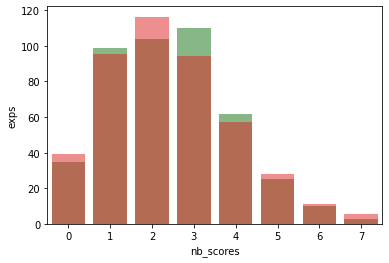

In [38]:
# Display sample and expectations
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.barplot(data = data1, x = 'nb_scores', y = 'nb_times', ax = ax, color = 'green', alpha = 0.5)
sns.barplot(data = data1, x = 'nb_scores', y = 'exps', ax = ax, color = 'red', alpha = 0.5)
plt.show()
# Both charts seem to largely overlap

In [69]:
# Let's perform a Chi-Square Goodness of fit test.
# Poisson distribution: 2 constraints, i.e. n-2 degrees of freedom (here n = 8 as we have 8 categories)
# Null hypothesis: the occurrence of scores follows a Poisson distribution
import scipy.stats as stats
pval1 = stats.chisquare(f_obs = data1.nb_times, f_exp=data1.exps, ddof=1)[1]
pval1
# p-value is above 0.05, we fail to reject the null hypothesis.

0.3705692339672493

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [44]:
obs2 = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]

# Mean
np.mean(obs2)
# 978.7

978.7333333333333

In [82]:
# t-test mean
# Null hypothesis: expected value (mean) of a sample of independent observations is equal to the given population mean.
pval2a = stats.ttest_1samp(obs2, 985)[1]
pval2a # 0.71
# pvalue above 0.05, we fail to reject to null hypothesis.

0.7059102752345554

In [45]:
# Standard deviation
np.std(obs2)
# 60.9

60.8785311547146

In [88]:
# Test standard deviation
# Null hypothesis: standard deviation is 50
# Left-sided as we test the standard deviation and not the variance
# http://www.milefoot.com/math/stat/ht-variance.htm
df = len(obs2) - 1
test_stat = ( df * np.std(obs2)**2 ) / (50**2)
pval2b = stats.chi2.cdf(test_stat, df = df)
pval2b # 0.89
# # pvalue above 0.05, we fail to reject to null hypothesis.

0.8919140563821656

In [89]:
# CONCLUSION: we failed to reject both null hypotheses
# Hence there is no reason to believe that there has been a change in the distribution of scores this year.

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [57]:
# Create dataframe

dct3 = {
    'nb_defects':[0,1,3,4,5],
    'obs_freq': [32,15,9,4,0]
}

data3 = pd.DataFrame(dct3)
data3

,nb_defects,obs_freq
0,0,32
1,1,15
2,3,9
3,4,4
4,5,0


In [58]:
# Convert frequency dataframe into array
import numpy as np

lst = []

for i in range(len(data3)):
    lst.extend([data3.nb_defects[i]] * data3.obs_freq[i])

sample3 = np.array(lst)

In [59]:
# Compute sample mean
np.mean(sample3)
# 0.967

0.9666666666666667

In [60]:
# Compute sample variable
np.var(sample3)
# 1.732
# Relatively different from mean, so it *may not* follow a Poisson distribution

1.7322222222222228

In [64]:
# Compute probability and expected frequency for all categories but the last one
probs3 = stats.poisson.pmf(data3.nb_defects[0:-1], np.mean(sample3))
exps3 = probs3 * data3.obs_freq.sum()
exps3

array([22.8209254 , 22.06022788,  3.43567623,  0.83028842])

In [65]:
# Add expected frequency for the last category (above 4)
# The sum of expectations has to be equal to the sum of observations
exps3 = np.append(exps3, data3.obs_freq.sum() - np.sum(exps3))
exps3

array([22.8209254 , 22.06022788,  3.43567623,  0.83028842, 10.85288207])

In [66]:
# Add expectations to dataframe
data3['exp_freq'] = exps3
data3

,nb_defects,obs_freq,exp_freq
0,0,32,22.820925
1,1,15,22.060228
2,3,9,3.435676
3,4,4,0.830288
4,5,0,10.852882


In [68]:
# Let's perform a Chi-Square Goodness of fit test.
# Poisson distribution: 2 constraints, i.e. n-2 degrees of freedom (here n = 8 as we have 8 categories)
# Null hypothesis: the occurrence of scores follows a Poisson distribution
import scipy.stats as stats
pval3 = stats.chisquare(f_obs = data3.obs_freq, f_exp=data3.exp_freq, ddof=1)[1]
pval3
# p-value is less than 0.05, we can the null hypothesis.
# The distribution of defective items does not follow a Poisson distribution.

2.9431706468587253e-08

## Question 4
A quality control engineer takes a simple of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [120]:
# Create a sample binomial distribution for the given n and p with the size of 200
# As the engineer takes a sample of n = 10 tires every day during size = 200 days

sample = np.random.binomial(n=10,p=0.05, size=200)
sample

array([0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

This shows that the probaility of defects is equal to around 40% for a binomial distribution with a given n and p. This is much higher than probaility fo 5%. Thus I can state that the sample does not come from binolial distribution.

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [100]:
# Create dataframe

dct5 = {
    'physical_activity':['Low','Medium','High'],
    'Yes':[32,14,6],
    'No': [12,22,9]
}

data5 = pd.DataFrame(dct5)
data5 = pd.melt(data5, id_vars=['physical_activity'], value_vars = ['Yes', 'No'], var_name='consume_sugardrinks', value_name='nb')
data5

,physical_activity,consume_sugardrinks,nb
0,Low,Yes,32
1,Medium,Yes,14
2,High,Yes,6
3,Low,No,12
4,Medium,No,22
5,High,No,9


In [104]:
cont_table = pd.crosstab(index=data5.physical_activity, columns = data5.consume_sugardrinks, values = data5.nb, aggfunc = np.sum)
cont_table

consume_sugardrinks,No,Yes
physical_activity,,
High,9,6
Low,12,32
Medium,22,14


In [106]:
# Chi-square test of independence of variables in a contingency table.

chi2, p, dof, expected = stats.chi2_contingency(cont_table)
p

# p-value below 5%, we reject the null hypothesis.
# In other words there is an association between patterns of physical activity and the consumption of sugary drinks
# for the children of this school.

0.004719280137040844